## Twitter Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("twitter_training.csv",names=['id', 'company', 'label', 'text'])

In [3]:
df

,id,company,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.shape

(74682, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   company  74682 non-null  object
 2   label    74682 non-null  object
 3   text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


#### Now we can check the null values

In [6]:
df.isnull().sum()

id           0
company      0
label        0
text       686
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df["label"].value_counts()

label
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [9]:
# here we can drop the labels which are Irrelevant
df = df[~(df["label"]=="Irrelevant")]

In [10]:
df.shape

(61121, 4)

#### Data Visualisation

<Axes: xlabel='label', ylabel='count'>

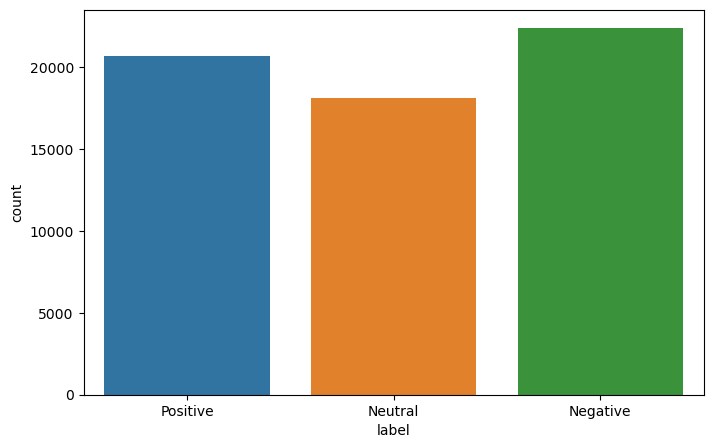

In [11]:
plt.figure(figsize=(8,5))
plt.xticks(rotation = 0)
sns.countplot(x = "label", data = df)

<Axes: xlabel='company', ylabel='count'>

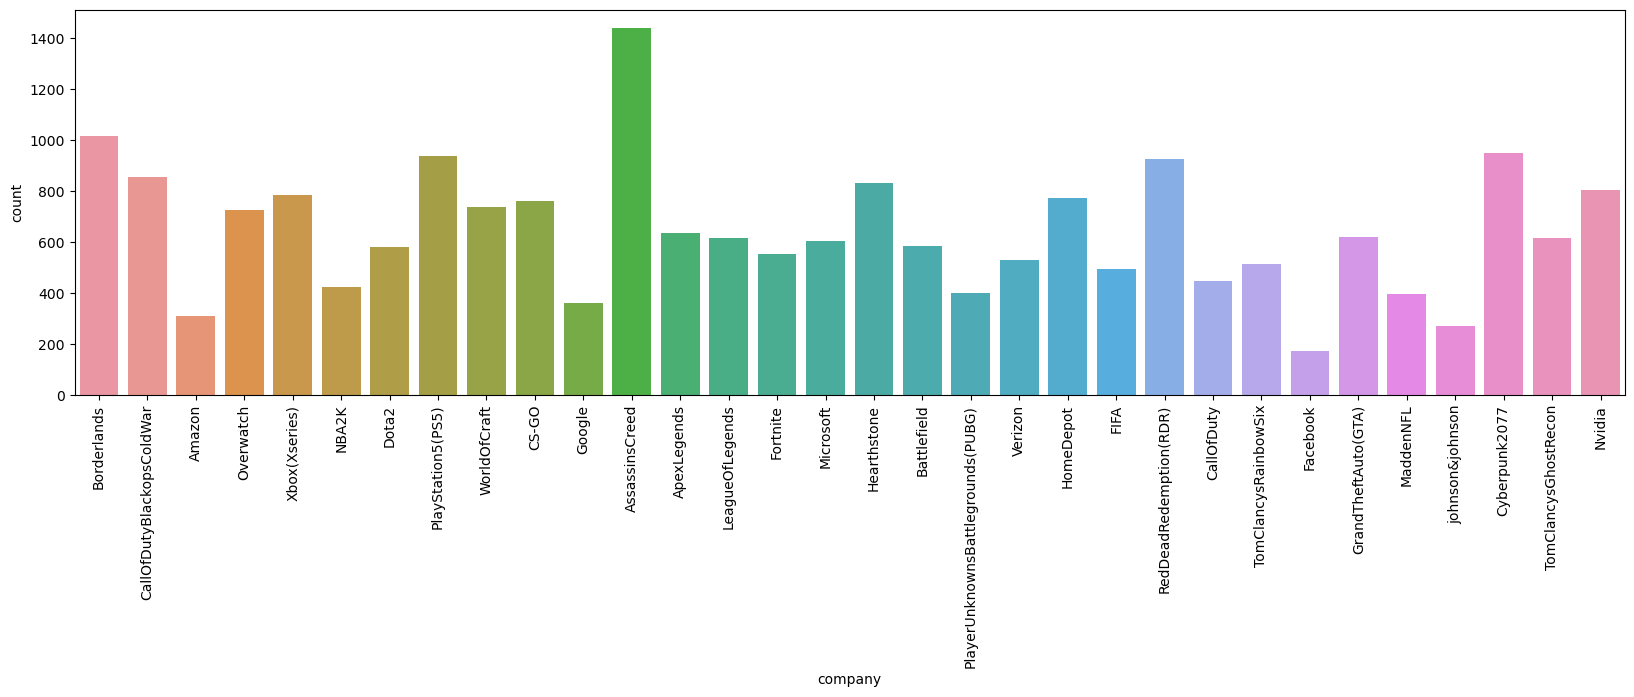

In [12]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
sns.countplot(x = "company", data = df[df["label"]=="Positive"])

Here we can see AssassinsCreed got the most Positive Tweets

<Axes: xlabel='company', ylabel='count'>

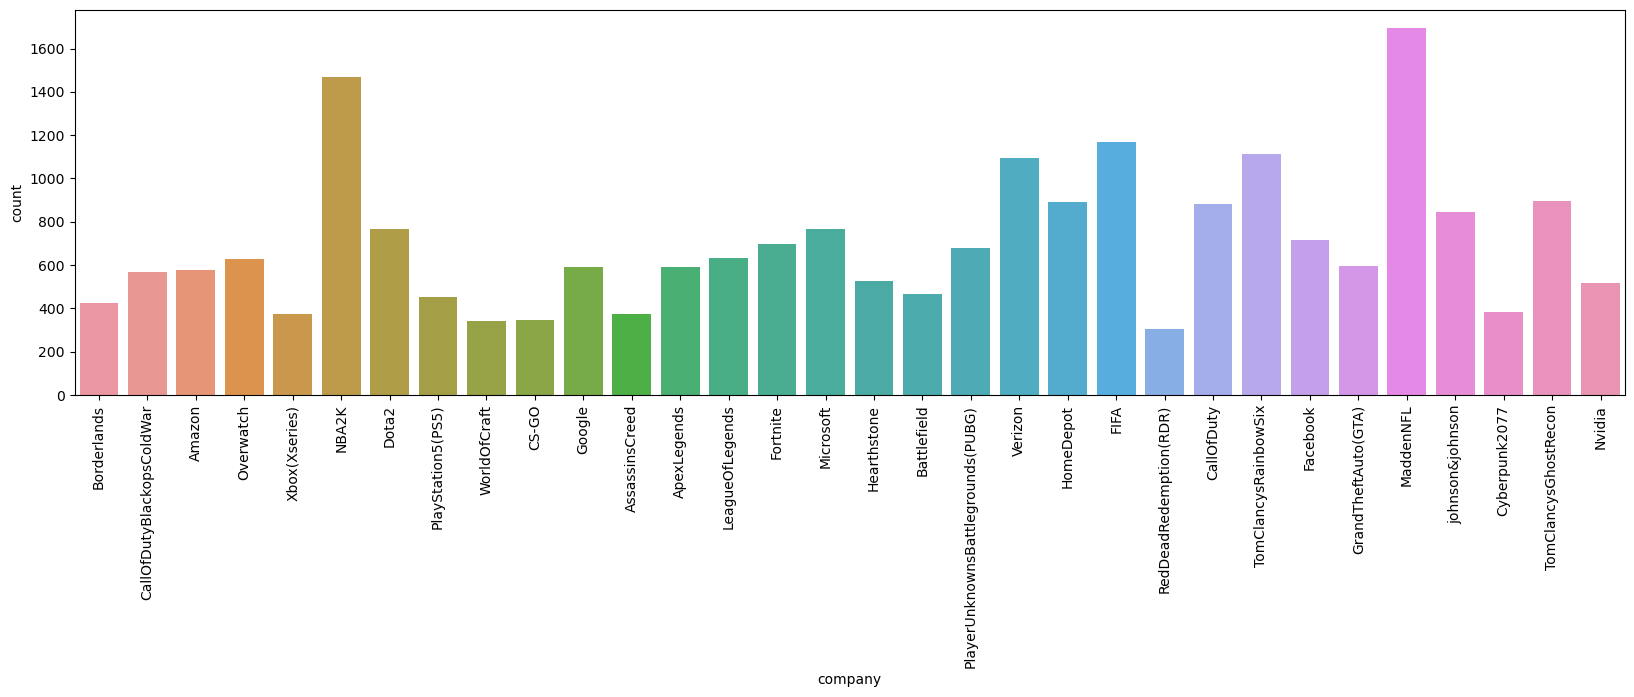

In [13]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
sns.countplot(x = "company", data = df[df["label"]=="Negative"])

Here we can see MaddenNFL got the most Negative Tweets

<Axes: xlabel='company', ylabel='count'>

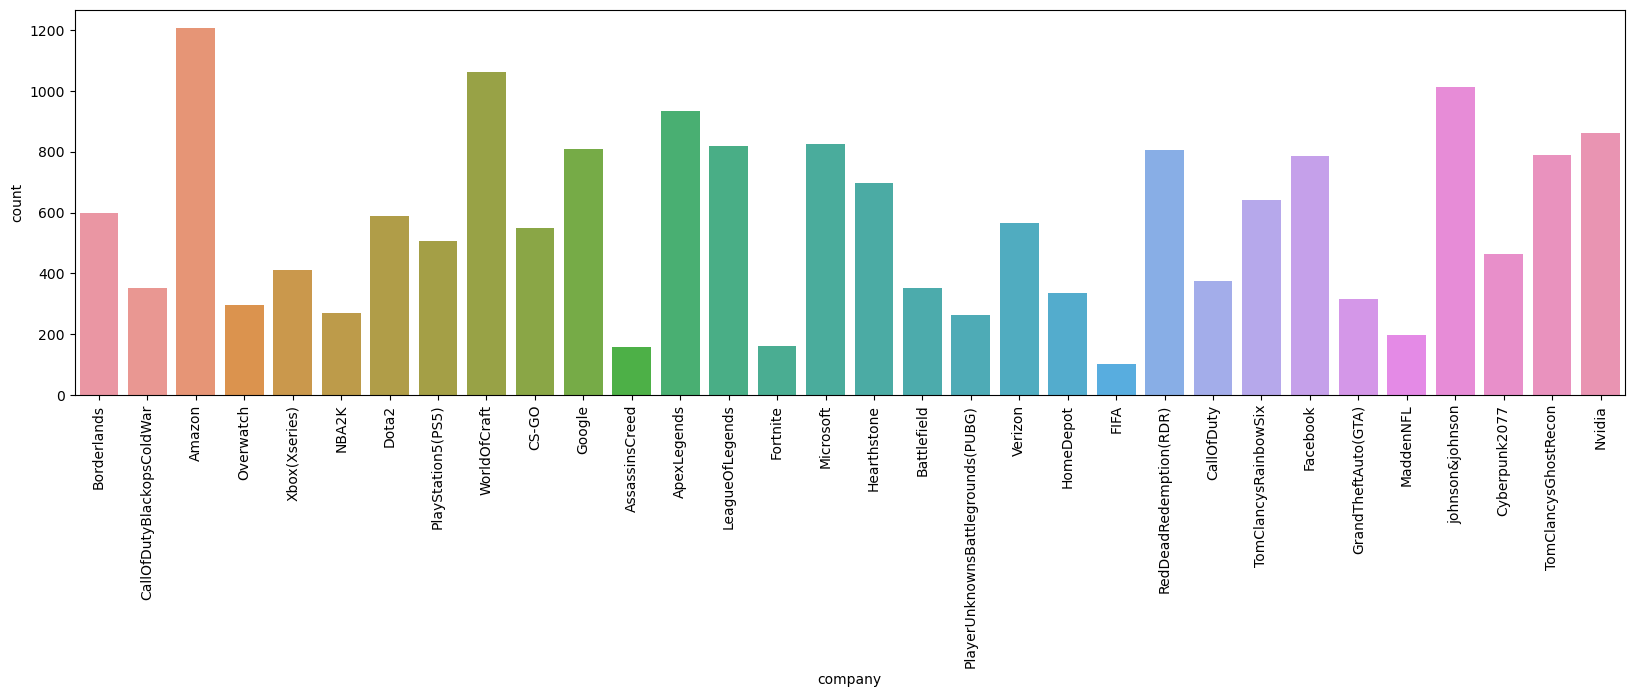

In [14]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
sns.countplot(x = "company", data = df[df["label"]=="Neutral"])

Here we can see Amazon got the most neutral Tweets

#### Here we need only two columns text and label for creating the model so we can drop the other columns

In [15]:
df = df.drop(["id","company"], axis=1)

In [16]:
df

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [17]:
tweet = df.text
tweet

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: text, Length: 61121, dtype: object

### Preprocessing DATA

#### we can Create  a Function which will preprocess our Tweets

In [18]:
import re

def clean_text(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove mentions and hashtags
    tweet = re.sub(r'@[A-Za-z0-9_]+|#[A-Za-z0-9_]+', '', tweet)
    
    # Remove special characters, numbers, and punctuation
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    
    # Remove 'RT' (Retweet) indicator
    tweet = re.sub(r'\bRT\b', '', tweet)
    
    return tweet.lower()

In [19]:
tweet = tweet.apply(clean_text)

In [20]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


def remove_stopwords(tweet):
    words = tweet.split(' ')
    words = [word for word in words if word not in set(stopwords.words('english'))]
    tweet = ' '.join(words)
    return tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
tweet = tweet.apply(remove_stopwords)

In [22]:
X = tweet

In [23]:
y = df["label"]

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

#### Now we can use a TfidfVectorizer to convert our tweets into numerical data


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec= vec.transform(X_test)

### Model selection

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
bayes = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors=7)
RC = RandomForestClassifier()
log_model = LogisticRegression()

models = [bayes,knn,RC,log_model]


In [27]:
for model in models:
    print(model)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(confusion_matrix(y_test, y_pred),"\n")
    print(classification_report(y_test, y_pred),"\n")
    print(accuracy_score(y_test, y_pred),"\n")
    

MultinomialNB()
[[4008  109  310]
 [ 855 2192  631]
 [ 643  134 3343]] 

              precision    recall  f1-score   support

    Negative       0.73      0.91      0.81      4427
     Neutral       0.90      0.60      0.72      3678
    Positive       0.78      0.81      0.80      4120

    accuracy                           0.78     12225
   macro avg       0.80      0.77      0.77     12225
weighted avg       0.80      0.78      0.78     12225
 

0.7806134969325154 

KNeighborsClassifier(n_neighbors=7)
[[3828  194  405]
 [ 380 2898  400]
 [ 344  320 3456]] 

              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85      4427
     Neutral       0.85      0.79      0.82      3678
    Positive       0.81      0.84      0.82      4120

    accuracy                           0.83     12225
   macro avg       0.83      0.83      0.83     12225
weighted avg       0.83      0.83      0.83     12225
 

0.8328834355828221 

RandomForestClassifier()
[

#### Now we can choose Random Forest  as our best fitting model

In [28]:
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

    Negative       0.93      0.91      0.92      4427
     Neutral       0.93      0.88      0.91      3678
    Positive       0.87      0.94      0.90      4120

    accuracy                           0.91     12225
   macro avg       0.91      0.91      0.91     12225
weighted avg       0.91      0.91      0.91     12225



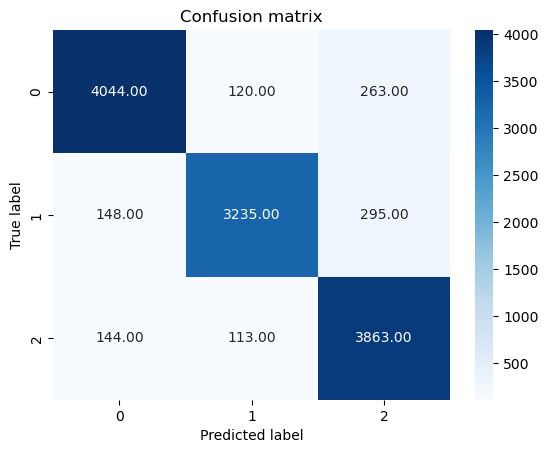

In [29]:
y_preds = model.predict(X_test_vec)
print(classification_report(y_test,y_preds))
cm = confusion_matrix(y_test,y_preds)
sns.heatmap(cm, annot=True, fmt=".2f", cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()


### we can create a pipeline 

In [30]:
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline([
    ("vectorizer",TfidfVectorizer()),
    ("model",RandomForestClassifier()) ])

model_pipeline.fit(X_train,y_train)


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [31]:
model_pipeline.predict(["very bad"])

array(['Negative'], dtype=object)

In [32]:
model_pipeline.predict(["very good"])

array(['Positive'], dtype=object)

In [33]:
model_pipeline.predict(["ok"])

array(['Positive'], dtype=object)